# Projet 2:

Consigne: Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :

    Quels sont les pays avec un fort potentiel de clients pour nos services ?
    Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
    Dans quels pays l'entreprise doit-elle opérer en priorité ?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
path1 = 'Data/EdStatsCountry.csv'
path2 = 'Data/EdStatsCountry-Series.csv'
path3 = 'Data/EdStatsData.csv'
path4 = 'Data/EdStatsFootNote.csv'
path5 = 'Data/EdStatsSeries.csv'

In [3]:
statcountry = pd.read_csv(path1, sep=',')
statcountry_s = pd.read_csv(path2, sep=',')
statdata = pd.read_csv(path3, sep=',')
statFootnote = pd.read_csv(path4, sep=',')
statseries = pd.read_csv(path5, sep=',')

## I - Exploration des Données :


On commence par visualiser les données:

In [6]:
statdata.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
statcountry_s.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [8]:
statFootnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [9]:
statcountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [10]:
statseries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


les types des colonnes et le taux de remplissages:

In [11]:
statseries.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [12]:
statdata.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

In [13]:
statcountry.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [14]:
statdata.isnull().mean()*100

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
                     ...    
2085               94.200670
2090               94.200670
2095               94.200670
2100               94.200670
Unnamed: 69       100.000000
Length: 70, dtype: float64

In [15]:
statcountry.isnull().mean()*100

Country Code                                           0.000000
Short Name                                             0.000000
Table Name                                             0.000000
Long Name                                              0.000000
2-alpha code                                           1.244813
Currency Unit                                         10.788382
Special Notes                                         39.834025
Region                                                11.203320
Income Group                                          11.203320
WB-2 code                                              0.414938
National accounts base year                           14.937759
National accounts reference year                      86.721992
SNA price valuation                                   18.257261
Lending category                                      40.248963
Other groups                                          75.933610
System of National Accounts             

In [16]:
statseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

je retire les doublons des dataframes et les colonnes avec plus de 95% de valeurs vides

In [17]:
statcountry.drop_duplicates()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN


In [18]:
statseries.drop_duplicates()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
statdata.drop_duplicates()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
statcountry = statcountry.dropna(axis=1, thresh = int(statcountry.shape[0]*0.05))
statcountry_s = statcountry_s.dropna(axis=1, thresh = int(statcountry_s.shape[0]*0.05))
statdata = statdata.dropna(axis=1, thresh = int(statdata.shape[0]*0.05))

Consigne : Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)

In [21]:
statcountry.shape

(241, 31)

In [22]:
statdata.shape

(886930, 51)

In [23]:
statseries.shape

(3665, 21)

## II - Choix des indicateurs
### A – Nettoyage de données


Consignes : Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
J’ai décidé de prendre trois types indicateurs différents pour répondre à la problématique :
•	usage internet
•	PIB
•	Projection sur les moyennes d’années d’études par tranches d’âges.


In [24]:
serie_select = statseries[(statseries['Series Code'] == 'IT.NET.USER.P2') |  (statseries['Series Code'] == 'NY.GDP.MKTP.PP.CD') | (statseries['Series Code'] == 'NY.GDP.PCAP.CD') | (statseries['Series Code'] == 'PRJ.MYS.1519.MF') | (statseries['Series Code'] == 'PRJ.MYS.2024.MF') | (statseries['Series Code'] == 'PRJ.MYS.2529.MF')]

Je fusionne les deux dataframes statdata et statseries avec uniquement les indicateurs selectionnés

In [25]:
newdf = statdata.merge(serie_select, how = 'inner',left_on='Indicator Code', right_on='Series Code')
newdf.drop_duplicates()
newdf.set_index(newdf['Country Name'], inplace = True)

J’explore les données de la même manière que ci-dessus et je réindexe mon data frame avec les noms des pays

In [26]:
newdf.head()

,Country Name,Country Code,Indicator Name_x,Indicator Code,1970,1975,1980,1985,1990,1991,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
Country Name,,,,,,,,,,,,,,,,,,,,,
Arab World,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,250.488643,817.393647,2031.556177,1576.156597,2003.988071,1920.271769,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
East Asia & Pacific,East Asia & Pacific,EAS,GDP per capita (current US$),NY.GDP.PCAP.CD,316.225712,647.331204,1163.155138,1405.905511,2609.261489,2896.885148,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
East Asia & Pacific (excluding high income),East Asia & Pacific (excluding high income),EAP,GDP per capita (current US$),NY.GDP.PCAP.CD,114.138515,198.501765,279.289684,359.619386,418.054648,446.999480,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Euro area,Euro area,EMU,GDP per capita (current US$),NY.GDP.PCAP.CD,2231.949573,5061.325652,9779.413724,7817.251997,18848.656596,19522.864390,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Europe & Central Asia,Europe & Central Asia,ECS,GDP per capita (current US$),NY.GDP.PCAP.CD,1365.643199,2975.588372,5729.824388,4601.794461,10487.536570,10777.697540,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
newdf.dropna(axis=1, thresh = int(newdf.shape[0]*0.1), inplace= True)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1452 entries, Arab World to Zimbabwe
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                1452 non-null   object 
 1   Country Code                1452 non-null   object 
 2   Indicator Name_x            1452 non-null   object 
 3   Indicator Code              1452 non-null   object 
 4   1970                        153 non-null    float64
 5   1975                        157 non-null    float64
 6   1980                        172 non-null    float64
 7   1985                        183 non-null    float64
 8   1990                        624 non-null    float64
 9   1991                        439 non-null    float64
 10  1992                        457 non-null    float64
 11  1993                        482 non-null    float64
 12  1994                        514 non-null    float64
 13  1995                     

On constate qu’il y a des valeurs qui ne correspondent pas des pays mais à des régions ou des groupes de revenues.

In [28]:
newdf.head(25)

,Country Name,Country Code,Indicator Name_x,Indicator Code,1970,1975,1980,1985,1990,1991,...,Series Code,Topic,Indicator Name_y,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source
Country Name,,,,,,,,,,,,,,,,,,,,,
Arab World,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,250.488643,817.393647,2031.556177,1576.156597,2003.988071,1920.271769,...,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
East Asia & Pacific,East Asia & Pacific,EAS,GDP per capita (current US$),NY.GDP.PCAP.CD,316.225712,647.331204,1163.155138,1405.905511,2609.261489,2896.885148,...,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
East Asia & Pacific (excluding high income),East Asia & Pacific (excluding high income),EAP,GDP per capita (current US$),NY.GDP.PCAP.CD,114.138515,198.501765,279.289684,359.619386,418.054648,446.999480,...,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
Euro area,Euro area,EMU,GDP per capita (current US$),NY.GDP.PCAP.CD,2231.949573,5061.325652,9779.413724,7817.251997,18848.656596,19522.864390,...,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
Europe & Central Asia,Europe & Central Asia,ECS,GDP per capita (current US$),NY.GDP.PCAP.CD,1365.643199,2975.588372,5729.824388,4601.794461,10487.536570,10777.697540,...,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
Europe & Central Asia (excluding high income),Europe & Central Asia (excluding high income),ECA,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,2461.354038,2364.757101,...,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
European Union,European Union,EUU,GDP per capita (current US$),NY.GDP.PCAP.CD,1936.266710,4256.509168,8328.212497,6717.861631,15813.946159,16374.986458,...,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),HPC,GDP per capita (current US$),NY.GDP.PCAP.CD,152.409191,261.483565,386.854162,332.304900,363.536400,362.935146,...,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
High income,High income,HIC,GDP per capita (current US$),NY.GDP.PCAP.CD,2811.009625,5241.454292,9596.756629,10536.894619,18954.829130,19882.382431,...,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."


Je selectionne les colonnes utiles de mon dernier dataframe selectionné et je remerge une derniere fois.

In [29]:
ss = statcountry[['Region', 'Income Group','Country Code']]
newdf1 = ss.merge(newdf, how='inner', on='Country Code')
newdf1.drop('Indicator Name_y',axis=1, inplace=True)

In [30]:
newdf1

,Region,Income Group,Country Code,Country Name,Indicator Name_x,Indicator Code,1970,1975,1980,1985,...,2100,Series Code,Topic,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source
0,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,...,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
1,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,...,NaN,NY.GDP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to...,Annual,NaN,Gap-filled total,NaN,NaN,"World Bank, International Comparison Program d..."
2,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,...,NaN,IT.NET.USER.P2,Infrastructure: Communications,Internet users are individuals who have used t...,Annual,NaN,Weighted average,Operators have traditionally been the main sou...,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T..."
3,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,9.1,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
4,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.2024.MF,NaN,NaN,NaN,NaN,...,11.0,PRJ.MYS.2024.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,Sub-Saharan Africa,Low income,ZWE,Zimbabwe,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,...,NaN,NY.GDP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to...,Annual,NaN,Gap-filled total,NaN,NaN,"World Bank, International Comparison Program d..."
1442,Sub-Saharan Africa,Low income,ZWE,Zimbabwe,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,...,NaN,IT.NET.USER.P2,Infrastructure: Communications,Internet users are individuals who have used t...,Annual,NaN,Weighted average,Operators have traditionally been the main sou...,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T..."
1443,Sub-Saharan Africa,Low income,ZWE,Zimbabwe,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,11.4,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
1444,Sub-Saharan Africa,Low income,ZWE,Zimbabwe,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.2024.MF,NaN,NaN,NaN,NaN,...,13.3,PRJ.MYS.2024.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...


Comme précédemment, Je réindexe selon les noms des pays.
Et je supprime les lignes qui ne correspondent pas à des pays que l’on a constaté ci-dessus.


In [31]:
newdf1.drop_duplicates()
newdf1.set_index(newdf1['Country Name'], inplace = True)
newdf1.drop(newdf.iloc[0:25].index, inplace=True)
newdf1.head()

,Region,Income Group,Country Code,Country Name,Indicator Name_x,Indicator Code,1970,1975,1980,1985,...,2100,Series Code,Topic,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,...,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
Aruba,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,...,NaN,NY.GDP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to...,Annual,NaN,Gap-filled total,NaN,NaN,"World Bank, International Comparison Program d..."
Aruba,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,...,NaN,IT.NET.USER.P2,Infrastructure: Communications,Internet users are individuals who have used t...,Annual,NaN,Weighted average,Operators have traditionally been the main sou...,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T..."
Aruba,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,9.1,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Aruba,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.2024.MF,NaN,NaN,NaN,NaN,...,11.0,PRJ.MYS.2024.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...


Quand on regarde les indicateurs statistiques des différentes régions, on constate que l’Amérique du Nord a la moyenne la plus grande pour tous les indicateurs sélectionnés. Mais on voit aussi que l’Amérique du Nord est constituée de deux ou trois pays seulement.



Pour le PIB par habitants :
Europe et Asie Central a le plus gros taux après l’Amérique avec un des nombres les plus important de pays mais aussi avec un écart type élevée mais un nombre plus important de pays.
On retrouve par la suite l'Asie de l'est et Pacifique ainsi que le moyen Orient et l'Afrique du Nord avec un PIB notable mais un ecart type plus grand que la moyenne.


In [32]:
gdp1 = newdf1[newdf1['Indicator Code'] == 'NY.GDP.PCAP.CD']
gdp1.groupby('Region')["2015"].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,33.0,15452.404629,19570.483693,1138.992271,2805.834140,4149.411429,27105.076226,75573.480714
Europe & Central Asia,55.0,28253.857790,30794.766248,918.677154,6190.887537,17155.874176,43337.574462,168146.015281
Latin America & Caribbean,33.0,9760.250046,7496.083116,814.546395,4849.997495,7602.261218,13467.102357,36350.821635
Middle East & North Africa,19.0,15628.012724,17319.664203,1401.903319,3687.906822,4974.026930,23252.481693,66346.522669
North America,2.0,49892.354705,9300.793655,43315.700442,46604.027574,49892.354705,53180.681837,56469.008969
South Asia,8.0,2725.527946,3047.610138,569.577923,1094.409193,1512.553815,2922.705473,9792.017334
Sub-Saharan Africa,46.0,2221.246160,3113.930755,300.676557,577.788480,891.534435,2313.443782,15390.040638


Pour le PIB brute:
On voit contrairement aux autres données que c'est l'Asie de l'Est et Pacifique et l'asie du sud qui ont le plus grand PIB après l'Amerique du Nord.

In [33]:
gdp2 = newdf1[newdf1['Indicator Code'] == 'NY.GDP.MKTP.PP.CD']
gdp2.groupby('Region')["2015"].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,30.0,1.186878e+12,3.687799e+12,3.901246e+07,1.183642e+09,4.656115e+10,6.981866e+11,1.985273e+13
Europe & Central Asia,50.0,5.556103e+11,9.323133e+11,1.982394e+09,3.904719e+10,1.823989e+11,4.397982e+11,3.934866e+12
Latin America & Caribbean,31.0,2.855528e+11,6.892388e+11,7.760530e+08,5.395945e+09,4.539622e+10,1.383304e+11,3.222821e+12
Middle East & North Africa,18.0,4.299126e+11,4.895843e+11,3.106272e+09,8.307381e+10,2.812998e+11,5.817028e+11,1.707833e+12
North America,2.0,9.852700e+12,1.169274e+13,1.584686e+12,5.718693e+12,9.852700e+12,1.398671e+13,1.812071e+13
South Asia,8.0,1.239731e+12,2.765895e+12,6.118016e+09,4.881452e+10,1.591015e+11,6.412772e+11,8.036536e+12
Sub-Saharan Africa,45.0,8.251776e+10,1.915742e+11,6.148247e+08,1.067788e+10,3.060621e+10,6.230890e+10,1.096183e+12


Pour les autres ordres de indicateurs, on peut voir une tendance que se rapproche de celle constater pour le PIB/hab (Gdp1).

In [34]:
internet = newdf1[newdf1['Indicator Code'] == 'IT.NET.USER.P2']
internet.groupby('Region')['2015'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,32.0,47.326961,27.610862,7.900000,21.913509,42.600000,73.355438,91.058028
Europe & Central Asia,53.0,72.488018,19.038749,14.996775,65.065503,72.900000,87.479056,98.200000
Latin America & Caribbean,37.0,53.097023,18.136996,12.197700,41.590000,54.215766,65.000000,88.661227
Middle East & North Africa,21.0,55.447096,25.724417,11.922431,37.819383,57.424192,76.184000,93.478301
North America,3.0,87.115937,11.942416,74.554202,81.512101,88.470000,93.396805,98.323610
South Asia,8.0,25.561539,15.487468,8.260000,14.300000,21.790809,32.441553,54.461955
Sub-Saharan Africa,47.0,18.187042,14.154121,1.083733,7.289581,16.500000,24.750000,54.259618


In [35]:
project1 = newdf1[newdf1['Indicator Code'] == 'PRJ.MYS.1519.MF']
project1.groupby('Region')['2040'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,23.0,10.056522,1.488693,7.7,9.200,9.80,10.700,13.0
Europe & Central Asia,47.0,9.834043,0.707499,8.7,9.300,9.80,10.200,12.1
Latin America & Caribbean,30.0,9.463333,0.931992,7.4,8.725,9.55,10.100,10.9
Middle East & North Africa,17.0,10.088235,1.098796,8.1,9.500,10.30,10.700,12.4
North America,2.0,10.700000,0.848528,10.1,10.400,10.70,11.000,11.3
South Asia,6.0,9.033333,0.880152,7.7,8.525,9.25,9.525,10.1
Sub-Saharan Africa,41.0,7.153659,1.533313,4.4,6.100,7.10,8.100,10.4


In [36]:
project2 = newdf1[newdf1['Indicator Code'] == 'PRJ.MYS.2024.MF']
project2.groupby('Region')['2040'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,23.0,11.930435,1.803389,8.5,10.55,11.90,13.300,14.6
Europe & Central Asia,47.0,12.457447,1.091418,10.2,11.55,12.60,13.100,15.3
Latin America & Caribbean,30.0,11.276667,1.054934,8.8,10.65,11.55,11.975,13.1
Middle East & North Africa,17.0,11.964706,1.283034,9.2,11.30,12.10,12.700,14.3
North America,2.0,13.300000,0.707107,12.8,13.05,13.30,13.550,13.8
South Asia,6.0,10.400000,0.869483,9.3,9.70,10.70,10.800,11.5
Sub-Saharan Africa,41.0,8.370732,1.931482,4.5,7.30,8.20,9.700,12.6


In [37]:
project3 = newdf1[newdf1['Indicator Code'] == 'PRJ.MYS.2529.MF']
project3.groupby('Region')['2040'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,23.0,12.434783,2.167657,8.4,11.100,12.20,14.450,15.6
Europe & Central Asia,47.0,13.295745,1.236748,10.6,12.400,13.60,14.150,16.1
Latin America & Caribbean,30.0,11.600000,1.151311,8.8,11.125,11.70,12.375,14.2
Middle East & North Africa,17.0,12.535294,1.404876,9.4,12.000,12.70,13.500,14.9
North America,2.0,14.350000,0.919239,13.7,14.025,14.35,14.675,15.0
South Asia,6.0,10.333333,0.943751,9.0,9.650,10.75,10.875,11.3
Sub-Saharan Africa,41.0,8.565854,2.151466,4.2,7.400,8.80,10.000,13.0


<AxesSubplot:xlabel='2015', ylabel='Count'>

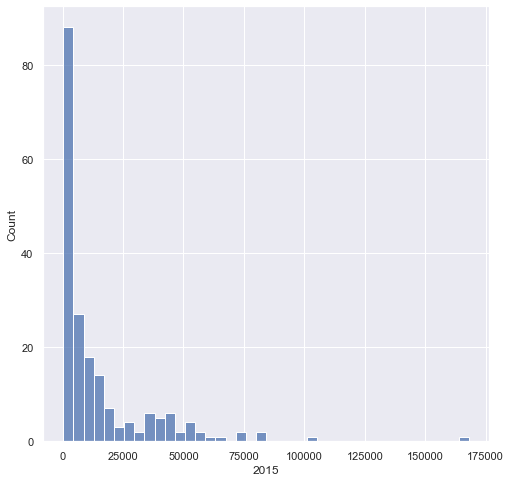

In [38]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.histplot(gdp1['2015'], bins=40)

Histogramme du PIB par habitant :
On constate certaines valeurs qui peuvent sembler aberrante mais on peut voir quand on filtre que ce sont des pays avec des groupes de revenus élevées


In [39]:
gdp1[gdp1["2015"] >= 70000]

,Region,Income Group,Country Code,Country Name,Indicator Name_x,Indicator Code,1970,1975,1980,1985,...,2100,Series Code,Topic,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source
Country Name,,,,,,,,,,,,,,,,,,,,,
Switzerland,Europe & Central Asia,High income: OECD,CHE,Switzerland,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,18832.196719,16655.337392,...,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
Isle of Man,Europe & Central Asia,High income: nonOECD,IMN,Isle of Man,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,...,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
Liechtenstein,Europe & Central Asia,High income: nonOECD,LIE,Liechtenstein,GDP per capita (current US$),NY.GDP.PCAP.CD,4236.930668,10514.999965,20671.998593,19410.756707,...,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
Luxembourg,Europe & Central Asia,High income: OECD,LUX,Luxembourg,GDP per capita (current US$),NY.GDP.PCAP.CD,4449.540387,9008.027890,17113.842252,12921.958421,...,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
"Macao SAR, China",East Asia & Pacific,High income: nonOECD,MAC,"Macao SAR, China",GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,4756.409365,...,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
Norway,Europe & Central Asia,High income: OECD,NOR,Norway,GDP per capita (current US$),NY.GDP.PCAP.CD,3306.219476,8204.451512,15772.240907,15753.552765,...,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."


<AxesSubplot:xlabel='2015', ylabel='Count'>

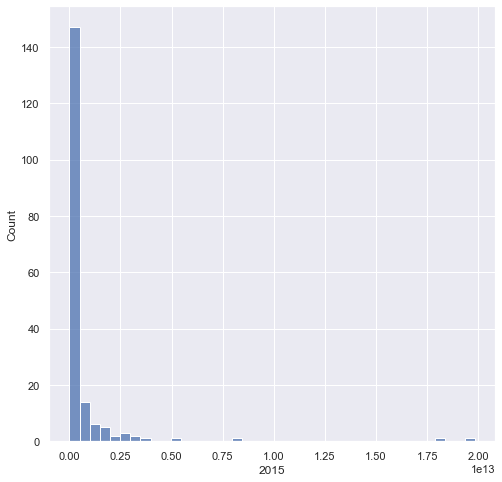

In [40]:
sns.histplot(gdp2['2015'], bins=40)

L’Inde et la Chine apparait comme étant un pays avec un fort PIB brute alors que ceux-ci ont des groupes à revenue plutôt moyens. Mais on notera que ces pays font parties des régions avec les plus grands pays bruts après l’Amérique du Nord.
Cela peut s’expliquer par le fait que ce sont des pays à fort population.


In [41]:
gdp2[gdp2['2015'] > 0.5*1e13]

,Region,Income Group,Country Code,Country Name,Indicator Name_x,Indicator Code,1970,1975,1980,1985,...,2100,Series Code,Topic,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source
Country Name,,,,,,,,,,,,,,,,,,,,,
China,East Asia & Pacific,Upper middle income,CHN,China,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,...,NaN,NY.GDP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to...,Annual,NaN,Gap-filled total,NaN,NaN,"World Bank, International Comparison Program d..."
India,South Asia,Lower middle income,IND,India,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,...,NaN,NY.GDP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to...,Annual,NaN,Gap-filled total,NaN,NaN,"World Bank, International Comparison Program d..."
Japan,East Asia & Pacific,High income: OECD,JPN,Japan,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,...,NaN,NY.GDP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to...,Annual,NaN,Gap-filled total,NaN,NaN,"World Bank, International Comparison Program d..."
United States,North America,High income: OECD,USA,United States,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,...,NaN,NY.GDP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to...,Annual,NaN,Gap-filled total,NaN,NaN,"World Bank, International Comparison Program d..."


<AxesSubplot:xlabel='2015', ylabel='Count'>

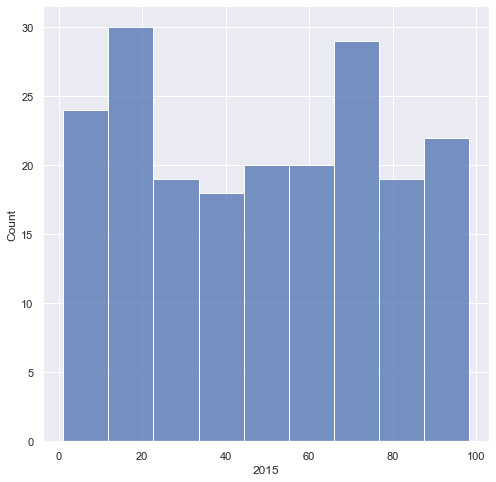

In [43]:
sns.histplot(internet['2015'])

Les projections sur la moyenne d’années d’études ont l’air de suivre des lois normales.

<AxesSubplot:xlabel='2040', ylabel='Count'>

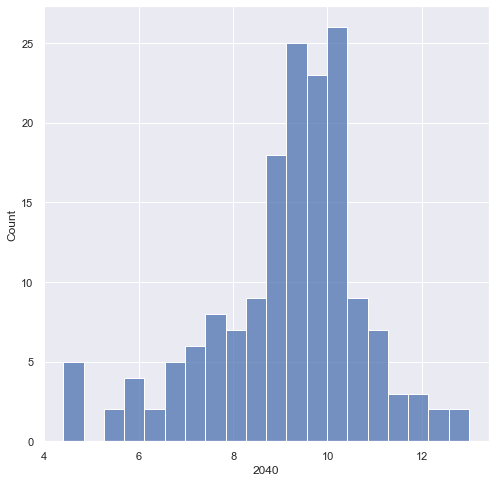

In [44]:
sns.histplot(project1['2040'], bins=20)

Les valeurs anormales sont des pays à faibles revenus par habitants. Ce ne sont pas des valeurs aberrantes.

In [45]:
project1[project1['2040'] < 5]

,Region,Income Group,Country Code,Country Name,Indicator Name_x,Indicator Code,1970,1975,1980,1985,...,2100,Series Code,Topic,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source
Country Name,,,,,,,,,,,,,,,,,,,,,
Burkina Faso,Sub-Saharan Africa,Low income,BFA,Burkina Faso,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,8.4,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Liberia,Sub-Saharan Africa,Low income,LBR,Liberia,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,8.3,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Mali,Sub-Saharan Africa,Low income,MLI,Mali,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,8.6,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Niger,Sub-Saharan Africa,Low income,NER,Niger,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,8.1,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Chad,Sub-Saharan Africa,Low income,TCD,Chad,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,8.7,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...


<AxesSubplot:xlabel='2040', ylabel='Count'>

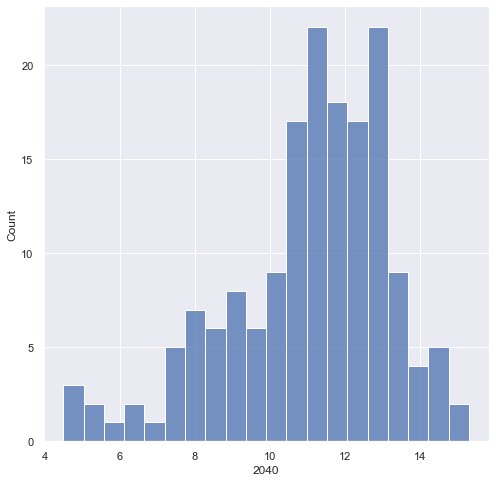

In [46]:
sns.histplot(project2['2040'], bins=20)

<AxesSubplot:xlabel='2040', ylabel='Count'>

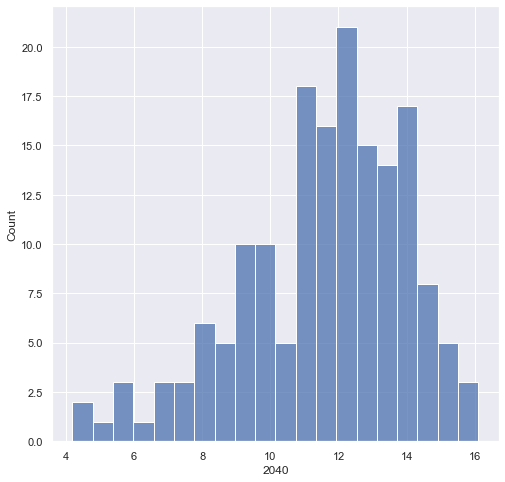

In [47]:
sns.histplot(project3['2040'], bins=20)

J’ai pris le dernier quartil de l’indicateur sur l’utilisation d’internet par pays pour sélectionner les pays pertinents pour une expansion à l’international. Puisque on n’a besoin d’une population qui utile beaucoup internet et avec une bonne connaissance de l’outil.

In [43]:
quartil = internet.groupby('Region')['2015'].describe()["75%"].mean()
selection = internet[internet['2015'] > quartil].index

In [44]:
gdp1.loc[selection]

,Region,Income Group,Country Code,Country Name,Indicator Name_x,Indicator Code,1970,1975,1980,1985,...,2100,Series Code,Topic,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,Latin America & Caribbean,High income: nonOECD,ABW,Aruba,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,...,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
Andorra,Europe & Central Asia,High income: nonOECD,AND,Andorra,GDP per capita (current US$),NY.GDP.PCAP.CD,3238.556850,7169.101006,12377.411646,7774.393829,...,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
United Arab Emirates,Middle East & North Africa,High income: nonOECD,ARE,United Arab Emirates,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,26556.080030,41825.995458,29189.167789,...,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
Argentina,Latin America & Caribbean,Upper middle income,ARG,Argentina,GDP per capita (current US$),NY.GDP.PCAP.CD,1317.487755,2011.689040,2738.284723,2909.516610,...,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
Antigua and Barbuda,Latin America & Caribbean,High income: nonOECD,ATG,Antigua and Barbuda,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,1789.589568,3452.522512,...,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Slovak Republic,Europe & Central Asia,High income: OECD,SVK,Slovak Republic,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,...,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
Slovenia,Europe & Central Asia,High income: OECD,SVN,Slovenia,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,...,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."
Sweden,Europe & Central Asia,High income: OECD,SWE,Sweden,GDP per capita (current US$),NY.GDP.PCAP.CD,4669.438672,9974.657321,16856.761086,13474.161346,...,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...,Annual,NaN,Weighted average,NaN,NaN,"World Bank national accounts data, and OECD Na..."


In [45]:
Project1 = project1.loc[selection]
Project2 = project2.loc[selection]
Project3 = project3.loc[selection]
Gdp1 = gdp1.loc[selection]
Gdp2 = gdp2.loc[selection]

In [47]:
selection

Index(['Aruba', 'Andorra', 'United Arab Emirates', 'Argentina',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Belgium',
       'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus',
       'Bermuda', 'Barbados', 'Brunei Darussalam', 'Canada', 'Switzerland',
       'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Dominica',
       'Denmark', 'Spain', 'Estonia', 'Finland', 'France', 'Faroe Islands',
       'United Kingdom', 'Greece', 'Greenland', 'Guam', 'Hong Kong SAR, China',
       'Croatia', 'Hungary', 'Ireland', 'Iceland', 'Israel', 'Japan',
       'Kazakhstan', 'St. Kitts and Nevis', 'Korea, Rep.', 'Kuwait', 'Lebanon',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Latvia',
       'Macao SAR, China', 'Monaco', 'Macedonia, FYR', 'Malta', 'Montenegro',
       'Malaysia', 'New Caledonia', 'Netherlands', 'Norway', 'New Zealand',
       'Oman', 'Poland', 'Puerto Rico', 'Portugal', 'Qatar',
       'Russian Federation', 'Saudi Arabia', 'Singap

Pour l’imputation du PIB :
PIB 1 (par habitant) : je prends la médiane du PIB par revenue moyen (Group Income) puisque cela dépend des revenues par personnes.
PIB 2 (brute) : ne dépendant pas seulement des revenues mais d’aussi d’autres facteurs comme la démographie j’ai décidé de prendre la moyenne par région.


In [52]:
income = Gdp1.groupby('Income Group').describe()
region = Gdp2.groupby('Region').describe()

In [53]:
liste1 = Gdp1[Gdp1["2015"].isna()].index
liste2 = Gdp2[Gdp2["2015"].isna()].index

In [54]:
liste2

Index(['Aruba', 'Andorra', 'Bermuda', 'Cayman Islands', 'Faroe Islands',
       'Greenland', 'Guam', 'Liechtenstein', 'Monaco', 'New Caledonia',
       'Puerto Rico'],
      dtype='object', name='Country Name')

In [55]:
for i1 in liste1:
    Gdp1.loc[i1, "2015"] = income.loc[Gdp1.loc[i1, 'Income Group'],"2015"].loc["50%"]

In [56]:
for i2 in liste2:
    Gdp2.loc[i2, "2015"] = region.loc[Gdp2.loc[i2, 'Region'],"2015"].loc["mean"]

In [57]:
Gdp1[Gdp1["2015"].isna()]

,Region,Income Group,Country Code,Country Name,Indicator Name_x,Indicator Code,1970,1975,1980,1985,...,2100,Series Code,Topic,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source
Country Name,,,,,,,,,,,,,,,,,,,,,


In [58]:
Gdp2[Gdp2["2015"].isna()]

,Region,Income Group,Country Code,Country Name,Indicator Name_x,Indicator Code,1970,1975,1980,1985,...,2100,Series Code,Topic,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source
Country Name,,,,,,,,,,,,,,,,,,,,,


J’avais décidé de prendre les pays ayant un PIB proche de celle dont je n’ai pas les valeurs et d’imputer par les valeurs de leur projection.

In [59]:
proj1 = Project1[Project1["2040"].isna()].index
proj2 = Project2[Project2["2040"].isna()].index
proj3 = Project3[Project3["2040"].isna()].index

In [60]:
proj1 == proj2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [61]:
proj2 == proj3

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

J'ai trié les PIB/hab dans l'ordre croissant.

In [62]:
tt = Gdp2['2015']
tt = tt.copy()
tt.sort_values(inplace = True)
tt1 = tt.reset_index()
tt1

,Country Name,2015
0,Dominica,7.760530e+08
1,St. Kitts and Nevis,1.399957e+09
2,Antigua and Barbuda,2.148739e+09
3,Cayman Islands,4.991379e+09
4,Barbados,4.991379e+09
...,...,...
68,Russian Federation,3.470239e+12
69,Germany,3.934866e+12
70,Japan,5.172862e+12
71,Bermuda,9.852700e+12


Je sélectionne l’indice des pays avec des valeurs manquante, j’incrémente (+1) l’index pour trouver le pays au PIB le plus proche de celle dont je cherche la valeur. Je remplace ensuite la valeur manquante avec la valeur de la projection du pays trouvé par incrémentation.

In [63]:
for e in proj1:
    i1 = tt1[tt1['Country Name'] == e].index.item() + 1
    if i1 < 73:
        if Project1.loc[tt1.loc[i1, 'Country Name'], '2040'] == 'nan':
            i1 += 1
        Project1.loc[e, '2040'] = Project1.loc[tt1.loc[i1, 'Country Name'], '2040']
        Project2.loc[e, '2040'] = Project3.loc[tt1.loc[i1, 'Country Name'], '2040']
        Project3.loc[e, '2040'] = Project3.loc[tt1.loc[i1, 'Country Name'], '2040']

In [64]:
Project1[Project1['2040'].isna()]

,Region,Income Group,Country Code,Country Name,Indicator Name_x,Indicator Code,1970,1975,1980,1985,...,2100,Series Code,Topic,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source
Country Name,,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,Latin America & Caribbean,High income: nonOECD,ATG,Antigua and Barbuda,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,NaN,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Dominica,Latin America & Caribbean,Upper middle income,DMA,Dominica,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,NaN,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Faroe Islands,Europe & Central Asia,High income: nonOECD,FRO,Faroe Islands,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,NaN,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Greenland,Europe & Central Asia,High income: nonOECD,GRL,Greenland,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,NaN,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
St. Kitts and Nevis,Latin America & Caribbean,High income: nonOECD,KNA,St. Kitts and Nevis,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,NaN,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...


In [65]:
Project2[Project2["2040"].isna()]

,Region,Income Group,Country Code,Country Name,Indicator Name_x,Indicator Code,1970,1975,1980,1985,...,2100,Series Code,Topic,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source
Country Name,,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,Latin America & Caribbean,High income: nonOECD,ATG,Antigua and Barbuda,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.2024.MF,NaN,NaN,NaN,NaN,...,NaN,PRJ.MYS.2024.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Dominica,Latin America & Caribbean,Upper middle income,DMA,Dominica,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.2024.MF,NaN,NaN,NaN,NaN,...,NaN,PRJ.MYS.2024.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Faroe Islands,Europe & Central Asia,High income: nonOECD,FRO,Faroe Islands,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.2024.MF,NaN,NaN,NaN,NaN,...,NaN,PRJ.MYS.2024.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Greenland,Europe & Central Asia,High income: nonOECD,GRL,Greenland,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.2024.MF,NaN,NaN,NaN,NaN,...,NaN,PRJ.MYS.2024.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
St. Kitts and Nevis,Latin America & Caribbean,High income: nonOECD,KNA,St. Kitts and Nevis,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.2024.MF,NaN,NaN,NaN,NaN,...,NaN,PRJ.MYS.2024.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...


In [66]:
Project3[Project3['2040'].isna()]

,Region,Income Group,Country Code,Country Name,Indicator Name_x,Indicator Code,1970,1975,1980,1985,...,2100,Series Code,Topic,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source
Country Name,,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,Latin America & Caribbean,High income: nonOECD,ATG,Antigua and Barbuda,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.2529.MF,NaN,NaN,NaN,NaN,...,NaN,PRJ.MYS.2529.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Dominica,Latin America & Caribbean,Upper middle income,DMA,Dominica,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.2529.MF,NaN,NaN,NaN,NaN,...,NaN,PRJ.MYS.2529.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Faroe Islands,Europe & Central Asia,High income: nonOECD,FRO,Faroe Islands,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.2529.MF,NaN,NaN,NaN,NaN,...,NaN,PRJ.MYS.2529.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Greenland,Europe & Central Asia,High income: nonOECD,GRL,Greenland,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.2529.MF,NaN,NaN,NaN,NaN,...,NaN,PRJ.MYS.2529.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
St. Kitts and Nevis,Latin America & Caribbean,High income: nonOECD,KNA,St. Kitts and Nevis,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.2529.MF,NaN,NaN,NaN,NaN,...,NaN,PRJ.MYS.2529.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...


Il reste encore des valeurs manquantes donc comme ci-dessus j’ai rempli en prenant les médianes selon les revenues moyennes.

In [67]:
income1 = Project1.groupby('Income Group').describe()
income2 = Project2.groupby('Income Group').describe()
income3 = Project3.groupby('Income Group').describe()

In [68]:
for e1 in proj1:
    Project1.loc[e1, "2040"] = income1.loc[Project1.loc[e1, 'Income Group'],"2040"].loc["50%"]

In [69]:
for e2 in proj2:
    Project2.loc[e2, "2040"] = income2.loc[Project2.loc[e2, 'Income Group'],"2040"].loc["50%"]

In [70]:
for e3 in proj3:
    Project3.loc[e3, "2040"] = income3.loc[Project3.loc[e3, 'Income Group'],"2040"].loc["50%"]

In [71]:
Project1[Project1['2040'].isna()]

,Region,Income Group,Country Code,Country Name,Indicator Name_x,Indicator Code,1970,1975,1980,1985,...,2100,Series Code,Topic,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source
Country Name,,,,,,,,,,,,,,,,,,,,,


In [72]:
Project2[Project2['2040'].isna()]

,Region,Income Group,Country Code,Country Name,Indicator Name_x,Indicator Code,1970,1975,1980,1985,...,2100,Series Code,Topic,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source
Country Name,,,,,,,,,,,,,,,,,,,,,


In [73]:
Project3[Project3['2040'].isna()]

,Region,Income Group,Country Code,Country Name,Indicator Name_x,Indicator Code,1970,1975,1980,1985,...,2100,Series Code,Topic,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source
Country Name,,,,,,,,,,,,,,,,,,,,,


## III - Analyse de données

Conignes :
-Quels sont les pays avec un fort potentiel de clients pour nos services ?
-Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
-Dans quels pays l'entreprise doit-elle opérer en priorité ?


<AxesSubplot:xlabel='2015', ylabel='Country Name'>

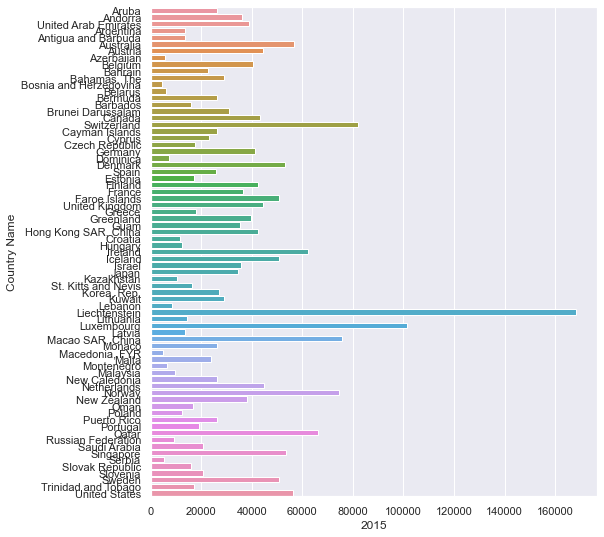

In [75]:
sns.set(rc = {'figure.figsize':(8,9)})
sns.barplot(data = Gdp1, y = Gdp1.index, x = '2015')

On observe une forte inégalité des pays. Ce qui me pousse à ne sélectionner que quelques lignes pour les PIB.

<AxesSubplot:xlabel='2015', ylabel='Country Name'>

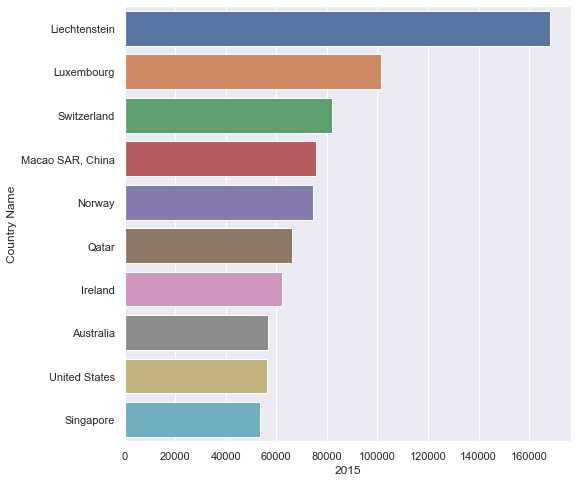

In [101]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.barplot(data = Gdp1.sort_values(by="2015", ascending=False)[:10], y = Gdp1.sort_values(by="2015", ascending=False)[:10].index, x = '2015')

<AxesSubplot:xlabel='2015', ylabel='Country Name'>

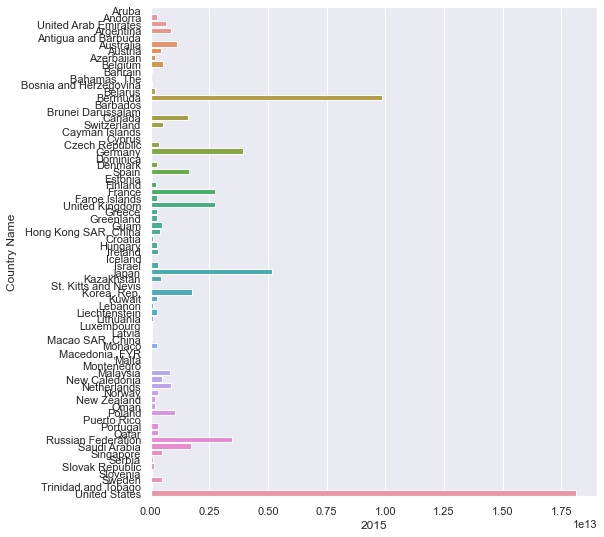

In [76]:
sns.set(rc = {'figure.figsize':(8,9)})
sns.barplot(data = Gdp2, y = Gdp2.index, x = '2015')

<AxesSubplot:xlabel='2015', ylabel='Country Name'>

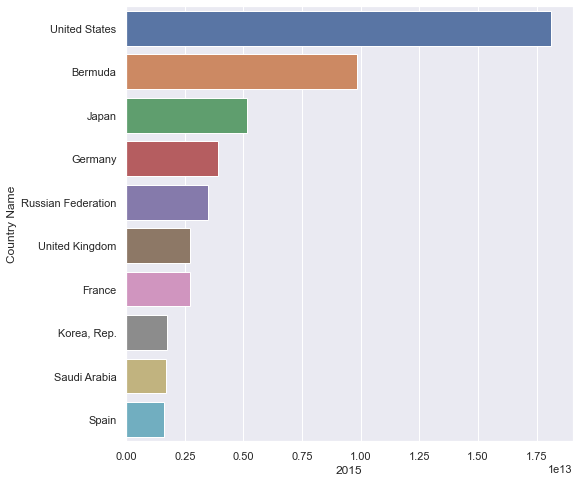

In [103]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.barplot(data = Gdp2.sort_values(by="2015", ascending=False)[:10], y = Gdp2.sort_values(by="2015", ascending=False)[:10].index, x = '2015')

<AxesSubplot:xlabel='2040', ylabel='Country Name'>

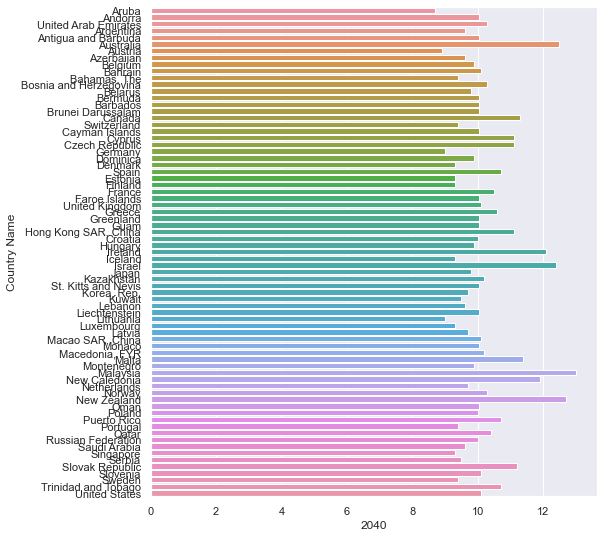

In [78]:
sns.set(rc = {'figure.figsize':(8,9)})
sns.barplot(data = Project1, y = Project1.index, x = '2040')

Pour les moyennes d’années d’études selon l’année 2040, les données sont plus homogènes, j’ai donc sélectionné plus de lignes pour ses indicateurs.

<AxesSubplot:xlabel='2040', ylabel='Country Name'>

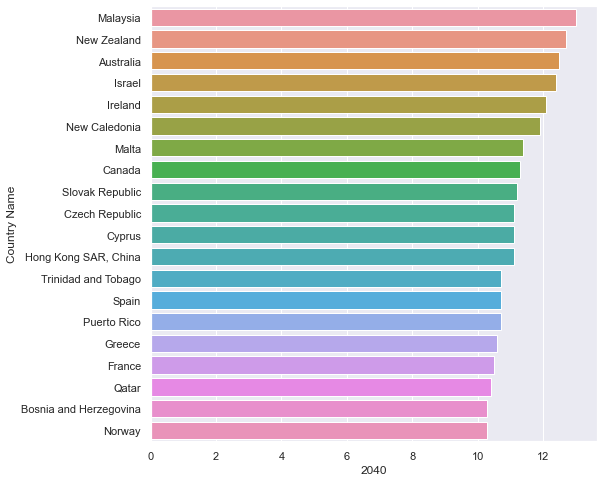

In [105]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.barplot(data = Project1.sort_values(by="2040", ascending=False)[:20], y = Project1.sort_values(by="2040", ascending=False)[:20].index, x = '2040')

<AxesSubplot:xlabel='2040', ylabel='Country Name'>

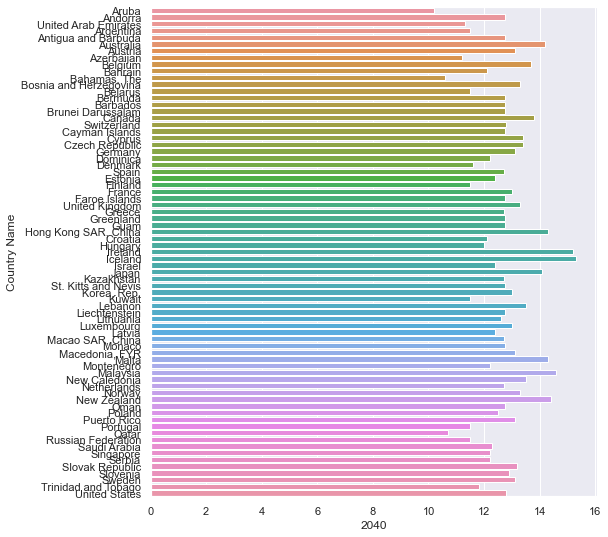

In [79]:
sns.set(rc = {'figure.figsize':(8,9)})
sns.barplot(data = Project2, y = Project2.index, x = '2040')

<AxesSubplot:xlabel='2040', ylabel='Country Name'>

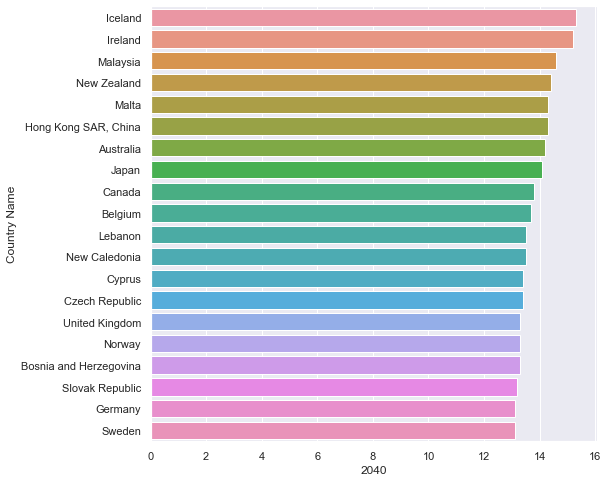

In [108]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.barplot(data = Project2.sort_values(by="2040", ascending=False)[:20], y = Project2.sort_values(by="2040", ascending=False)[:20].index, x = '2040')

<AxesSubplot:xlabel='2040', ylabel='Country Name'>

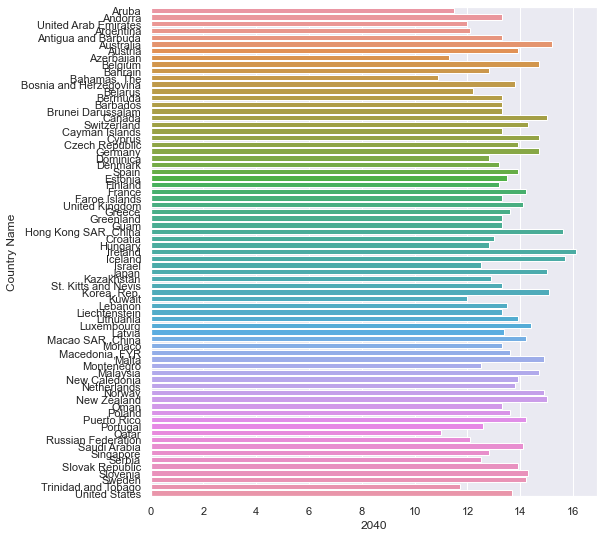

In [80]:
sns.set(rc = {'figure.figsize':(8,9)})
sns.barplot(data = Project3, y = Project3.index, x = '2040')

<AxesSubplot:xlabel='2040', ylabel='Country Name'>

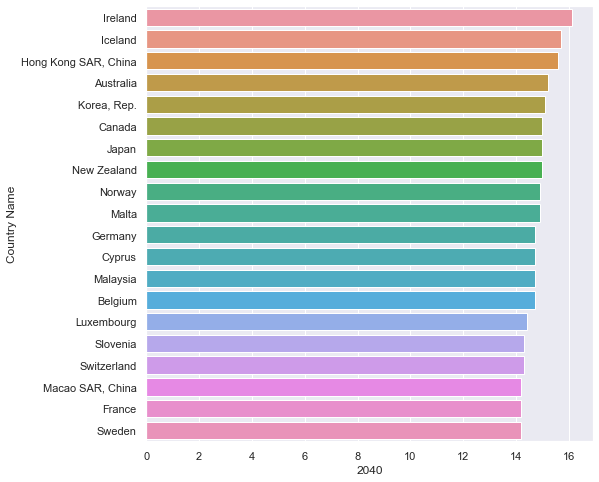

In [110]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.barplot(data = Project3.sort_values(by="2040", ascending=False)[:20], y = Project3.sort_values(by="2040", ascending=False)[:20].index, x = '2040')

In [85]:
Project1.sort_values(by="2040",ascending=False)[:20]

,Region,Income Group,Country Code,Country Name,Indicator Name_x,Indicator Code,1980,1985,1990,1991,...,2100,Series Code,Topic,Long definition,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Source
Country Name,,,,,,,,,,,,,,,,,,,,,
Malaysia,East Asia & Pacific,Upper middle income,MYS,Malaysia,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,13.4,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
New Zealand,East Asia & Pacific,High income: OECD,NZL,New Zealand,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,13.0,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Australia,East Asia & Pacific,High income: OECD,AUS,Australia,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,12.8,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Israel,Middle East & North Africa,High income: OECD,ISR,Israel,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,13.4,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Ireland,Europe & Central Asia,High income: OECD,IRL,Ireland,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,12.2,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
New Caledonia,East Asia & Pacific,High income: nonOECD,NCL,New Caledonia,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,12.3,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Malta,Middle East & North Africa,High income: nonOECD,MLT,Malta,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,12.0,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Canada,North America,High income: OECD,CAN,Canada,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,11.5,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...
Slovak Republic,Europe & Central Asia,High income: OECD,SVK,Slovak Republic,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,NaN,NaN,NaN,NaN,...,11.8,PRJ.MYS.1519.MF,Attainment,Mean number of years spent in school by age gr...,NaN,Projections (2010 to 2100),NaN,NaN,NaN,Wittgenstein Centre for Demography and Global ...


conclure,
Les premiers pays sélectionnés pour une expansion à l’international sont : Ireland, Australie et la Norvege étant des pays avec une bonne perspective d’éducation pour toutes (ou quasiment toute) tranches d’âges et avec un PIB assez élevé.
Dans un second temps, on peut considérer les pays suivant : Japon et l’Allemagne avec des PIB élevés et un taux éducation élevé pour certaines tranches d’âge. On pourra aussi noter les Etats Unis qui fait partie du top dix des PIB/hab et le plus haut PIB brute.

